# Calculating topographic factors from vtm

Define S1 probes

In [11]:
from cfdmod.use_cases.s1.probe import S1Probe
import pathlib

field_data_path = pathlib.Path("./fixtures/tests/s1/vtm/example.vtm") 

pitot_probe = S1Probe(p1=[1,10,1], p2=[1,10,40], numPoints=100)
example_probe = S1Probe(p1=[10,10,1], p2=[10,10,40], numPoints=100)

pitot_probe, example_probe

(S1Probe(p1=[1.0, 10.0, 1.0], p2=[1.0, 10.0, 40.0], numPoints=100),
 S1Probe(p1=[10.0, 10.0, 1.0], p2=[10.0, 10.0, 40.0], numPoints=100))

Extract data from multiblock dataset

In [12]:
from cfdmod.api.vtk.probe_vtm import read_vtm, create_line, probe_over_line, get_array_from_filter

reader = read_vtm(field_data_path)

pitot_line = create_line(pitot_probe.p1, pitot_probe.p2, pitot_probe.numPoints - 1)
probe_line = create_line(example_probe.p1, example_probe.p2, example_probe.numPoints - 1)

pitot_filter = probe_over_line(pitot_line, reader)
probe_filter = probe_over_line(probe_line, reader)

pitot_data = get_array_from_filter(pitot_filter, array_lbl="ux")
probe_data = get_array_from_filter(probe_filter, array_lbl="ux")

pitot_data[:10], probe_data[:10]

(array([-0.00102558, -0.00102558, -0.00102558,  0.01001426,  0.01001426,
         0.01001426,  0.02488436,  0.02488436,  0.03309282,  0.03309282],
       dtype=float32),
 array([0.00672358, 0.00672358, 0.00672358, 0.0153533 , 0.0153533 ,
        0.0153533 , 0.02437829, 0.02437829, 0.03125096, 0.03125096],
       dtype=float32))

Create profiles from extracted data

In [13]:
from cfdmod.use_cases.s1.profile import Profile
import numpy as np

pitot_pos = np.linspace(pitot_probe.p1[2], pitot_probe.p2[2], pitot_probe.numPoints)
probe_pos = np.linspace(example_probe.p1[2], example_probe.p2[2], example_probe.numPoints)

pitot_profile = Profile(pos=pitot_pos, values=pitot_data, label="Pitot")
probe_profile = Profile(pos=probe_pos, values=probe_data, label="Example probe")

s1_profile = probe_profile / pitot_profile

s1_profile

pos: [ 0.39393939  0.78787879  1.18181818  1.57575758  1.96969697  2.36363636
  2.75757576  3.15151515  3.54545455  3.93939394  4.33333333  4.72727273
  5.12121212  5.51515152  5.90909091  6.3030303   6.6969697   7.09090909
  7.48484848  7.87878788  8.27272727  8.66666667  9.06060606  9.45454545
  9.84848485 10.24242424 10.63636364 11.03030303 11.42424242 11.81818182
 12.21212121 12.60606061 13.         13.39393939 13.78787879 14.18181818
 14.57575758 14.96969697 15.36363636 15.75757576 16.15151515 16.54545455
 16.93939394 17.33333333 17.72727273 18.12121212 18.51515152 18.90909091
 19.3030303  19.6969697  20.09090909 20.48484848 20.87878788 21.27272727
 21.66666667 22.06060606 22.45454545 22.84848485 23.24242424 23.63636364
 24.03030303 24.42424242 24.81818182 25.21212121 25.60606061 26.
 26.39393939 26.78787879 27.18181818 27.57575758 27.96969697 28.36363636
 28.75757576 29.15151515 29.54545455 29.93939394 30.33333333 30.72727273
 31.12121212 31.51515152 31.90909091 32.3030303  32.69

Plotting Velocity Profiles extracted

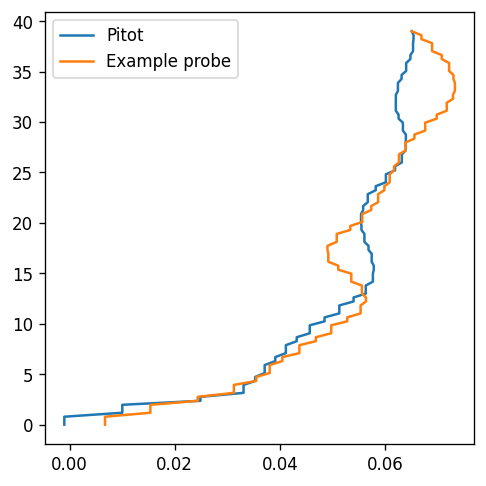

In [14]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(pitot_profile.values, pitot_profile.pos, label=pitot_profile.label)
ax.plot(probe_profile.values, probe_profile.pos, label=probe_profile.label)
# set_style_tech()
ax.legend()
plt.show(fig)
plt.close(fig)

Plotting S1

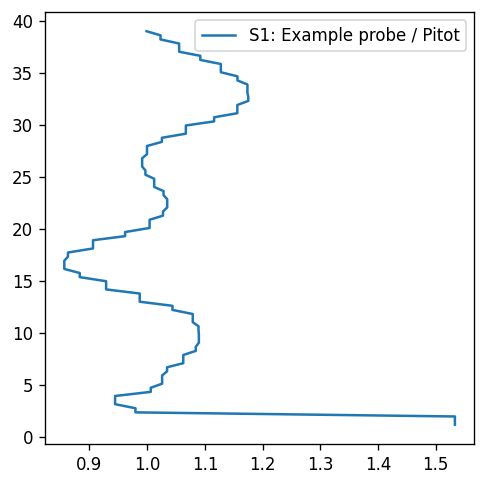

In [19]:
import matplotlib.pyplot as plt
from cfdmod.use_cases.s1.plotting import set_style_tech

fig, ax = plt.subplots(figsize=(10 / 2.54, 10 / 2.54), constrained_layout=True, dpi=120)

ax.plot(s1_profile.values[2:], s1_profile.pos[2:], label=s1_profile.label)

# set_style_tech()
ax.legend()
plt.show(fig)
# plt.close(fig)